# Examining the Effect of Review Count and Location on Stars Earned by Businesses on Yelp

## Introduction

### Overview
Yelp is company that publishes Yelp.com, a website dedicated to crowd-sourced reviews about businesses. Yelp has many key features that help users consume products and services in the most effective way possible. The website and mobile application contains information regarding location (street, city, state/province, country, latitude, longitude), opening and closing hours, services provided, number of reviews, average reviews, business attributes (e.g. accepts credit cards), and taggable categories (e.g. restaurant, health & medical, good for kids, etc.).

In the first iteration of this project, I look to identify a statistical relationship between a business' location, number of reviews, and rating on Yelp out of 5.0 (with 5.0 being the best). More specifically, I examine businesses from Toronto, and look to determine whether the number of reviews or its location has any predictive power when it comes to determining the rating of a business on Yelp. This data exploration includes summary statistics, a stacked bar chart, a histogram, a set of boxplots, and two sets of maps.

In the second iteration of this project, I improve upon the data exploration of the first draft by fine-tuning the plots from the first iteration, including a draft of a data visualization stratifying the Yelp data by city wards, and adding three new maps, including an interactive one shown below. I conclude by discussing some limitations of this work and how future projects may use and improve upon this notebook.

In the third iteration of this project, I build upon the analysis of the first two iterations by adding more information to my working dataset. In particular, I incorporate web-scraped Toronto community demographic data to add more rigour to the location-based explanatory variable. 

In the final iteration of this project, I include a literature review to the introduction, perform four ordinary least squares regressions on my working dataset and created a regression tree as well. I conclude the paper by restating my findings, acknowledging their limitations, and providing some ideas and inspirations for future work.

An updated version of the data used in this project can be found at: https://www.kaggle.com/yelp-dataset/yelp-dataset.
The GitHub repository containing this notebook and any relevant datasets can be found at: https://github.com/neelvisen/yelp-toronto-businesses-eda.

### Literature Review
Several works have been published regarding the impact of Yelp data on businesses. In a study for Harvard Business School, Michael Luca uses Bayesian learning to show that, "consumer response to a restaurant's average rating is affected by the number of reviews": (https://www.hbs.edu/ris/Publication%20Files/12-016_a7e4a5a2-03f9-490d-b093-8f951238dba2.pdf). Luca investigates a novel dataset comprised of Yelp data and restaurant information from the state of Washington's Department of Revenue. He manages to identify a causal relationship between Yelp ratings on consumer demand with a regression discontinuity framework that accounts for Yelp's rounding of business scores as well. Luca concludes that consumers tend not to use all available business information available to them, but still respond more strongly when business reviews are more comprehensive. Furthermore, he argues that consumers are more responsive to to businesses whose quality changes are more visible in nature.

In terms of location, Tayeen et al. demonstrate in a 2009 study that a business' proximity to certain points of interest such as city landmarks, restaurants, and competing businesses can increase the likelihood of business being successful:(https://dl.acm.org/doi/10.1145/3341161.3345334). As perhaps the first study to quantify the impact of location on the success of businesses, Tayeen and colleagues show that, "when a location is considered singularly, different determinant categories such as demographics, tourism, business convenience, safeness can have positive impact on restaurant success."

In their 2017 study, Yu et al. apply various machine learning techniques to identify restaurant features from Yelp reviews: (https://arxiv.org/ftp/arxiv/papers/1709/1709.08698.pdf). Although their use of support vector machines (SVM) extends beyond the scope of this notebook, their work helps decipher the overall sentiment of each review in their dataset. Word scores generated by their SVM models are further categorized by their significance to particular aspects of restaurants and reaffirm commonly held views about particular restaurants: "Japanese cuisines are usually fresh, some French cuisines are overprices while Italian Restaurants are often famous for their pizzas."

### The Purpose of this Paper
There are several reasons why I chose to work with Kaggle's Yelp dataset over some of the others available. As a restaurant lover, I am more than familiar with the importance of review sites like Yelp, and have often relied on the application to make judgements about where to shop/eat. 

More specifically, I've found that I almost always use Yelp whenever I find myself in a new location (e.g. after an event, while at a friend's house, post-travel, etc.), where I am unfamiliar with the the quality of local businesses. Within the app itself, I've tended to focus on two key metrics as well: the number of reviews a business has, and the overall rating it possesses. 

Knowing these things about myself as a Yelp user made formulating a research question trivial: 

##### Research Question: For businesses in Toronto, can location and number of reviews predict the number of stars (i.e. rating) it receives from users?

## Project One

### Importing and Cleaning the Yelp Dataset

The following analysis utilizes four commonly known python packages: pandas (which is used to import and clean the data), matplotlib (which is used for formatting), pyplot (from matplotlib, which is used for plotting), and seaborn (which is used for plotting).

In [1]:
# import packages for analysis
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from geojson import Point, Polygon, Feature
from sklearn import (linear_model, metrics, pipeline, model_selection, tree)
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
import itertools
import plotly
import plotly.offline as py # make offline 
import plotly.express as px
py.init_notebook_mode(connected=True)
# this will allow ploting inside the notebook

The Yelp data used in this project was sourced from Kaggle. According to their description, "This dataset is a subset of Yelp's businesses, reviews, and user data...put together for the Yelp Dataset Challenge." The data is stored as both CSV and JSON files, and can be found at the following link: https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6.

In [2]:
# reading in the data
yelp_business = pd.read_json("yelp_academic_dataset_business.json", lines = True)
yelp_business.head()

business_id                      name  \
0  f9NumwFMBDn751xgFiRbNA  The Range At Lake Norman   
1  Yzvjg0SayhoZgCljUJRF9Q         Carlos Santo, NMD   
2  XNoUzKckATkOD1hP6vghZg                   Felinus   
3  6OAZjbxqM5ol29BuHsil3w      Nevada House of Hose   
4  51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC   

                     address             city state postal_code   latitude  \
0            10913 Bailey Rd        Cornelius    NC       28031  35.462724   
1  8880 E Via Linda, Ste 107       Scottsdale    AZ       85258  33.569404   
2      3554 Rue Notre-Dame O         Montreal    QC     H4C 1P4  45.479984   
3             1015 Sharp Cir  North Las Vegas    NV       89030  36.219728   
4         4827 E Downing Cir             Mesa    AZ       85205  33.428065   

    longitude  stars  review_count  is_open  \
0  -80.852612    3.5            36        1   
1 -111.890264    5.0             4        1   
2  -73.580070    5.0             5        1   
3 -115.127725    2.5             3        0   
4 -111.726648    4.5            26        1   

                                          attributes  \
0  {'BusinessAcceptsCreditCards': 'True', 'BikePa...   
1  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   
2                                               None   
3  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
4  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   

                                          categories  \
0  Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...   
1  Health & Medical, Fitness & Instruction, Yoga,...   
2                   Pets, Pet Services, Pet Groomers   
3  Hardware Stores, Home Services, Building Suppl...   
4  Home Services, Plumbing, Electricians, Handyma...   

                                               hours  
0  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...  
1                                               None  
2                                               None  
3  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...  
4  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...

Because I want to only look at certain variables in the dataset, I filter out some of them in the following code chunks. Namely, I want to keep a business' name, latitude, longitude, city, and state (Toronto data only), number of reviews, and rating.

In [3]:
# removing unnecessary categories
# leaves city, state, latitude, longitude, stars, and review count only
yelp_business_cleaned = yelp_business[["name", "city", "state", "latitude", "longitude", "stars", "review_count"]]
yelp_business_cleaned.head()

name             city state   latitude   longitude  \
0  The Range At Lake Norman        Cornelius    NC  35.462724  -80.852612   
1         Carlos Santo, NMD       Scottsdale    AZ  33.569404 -111.890264   
2                   Felinus         Montreal    QC  45.479984  -73.580070   
3      Nevada House of Hose  North Las Vegas    NV  36.219728 -115.127725   
4   USE MY GUY SERVICES LLC             Mesa    AZ  33.428065 -111.726648   

   stars  review_count  
0    3.5            36  
1    5.0             4  
2    5.0             5  
3    2.5             3  
4    4.5            26

In [4]:
# taking Toronto data only
yelp_tor = yelp_business_cleaned["city"].isin(["Toronto"])
yelp_tor = yelp_business_cleaned[yelp_tor]

yelp_tor.head()

name     city state   latitude  longitude  stars  \
9           Xtreme Couture  Toronto    ON  43.624539 -79.529108    3.0   
26        Air Jordan Store  Toronto    ON  43.656542 -79.381308    4.0   
29     Front Door Organics  Toronto    ON  43.603232 -79.538424    4.0   
38  Gourmet Burger Company  Toronto    ON  43.633291 -79.531768    3.0   
52     Bath and Body Works  Toronto    ON  43.727189 -79.293008    3.5   

    review_count  
9             16  
26             9  
29             8  
38            13  
52             7

### Summary Statistics of the Yelp Data

Now that I have my working dataframe of Toronto yelp data, I can conduct some summary statistics on each numeric variable below.

In [5]:
# summary statistics for Toronto businesses
yelp_tor.describe() 

latitude     longitude         stars  review_count
count  20366.000000  20366.000000  20366.000000  20366.000000
mean      43.679511    -79.394862      3.414367     28.651282
std        0.043918      0.060457      0.944043     65.240050
min       43.584846    -79.713930      1.000000      3.000000
25%       43.650579    -79.418920      3.000000      4.000000
50%       43.664456    -79.394136      3.500000      9.000000
75%       43.691593    -79.375347      4.000000     25.000000
max       43.881942    -79.019777      5.000000   2758.000000

Although the summary statistics for latitude and longitude mean little, they do confirm that there are no outlier datapoints. That is, no typos, data entry mistakes, or businesses from outside of Toronto in the dataframe. Looking at stars, I notice that the mean rating of a Toronto business on Yelp is ~3.41, with a median of 3.5, both reasonable ratings for an "average" business. As for number of reviews, I see that the mean number of reviews is ~28.7, whereas the median number is only 9. Naturally, there are some businesses that have far more customers and active reviewers than others (e.g. an Instagram friendly coffee shop in the Kensington Market), which drag the mean upwards. To show the full distribution of the number of reviews, I create a stacked bar chart below.

### Figure 1: Distribution of the Number of Reviews (Stacked Bar Chart)

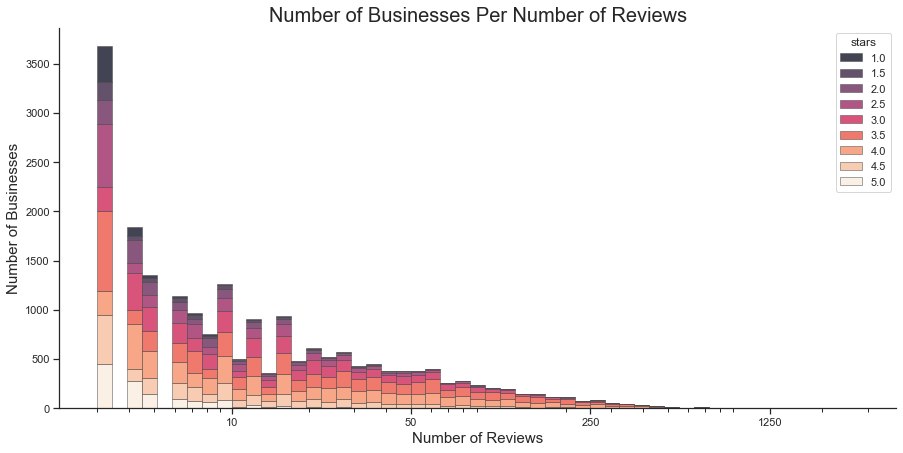

In [6]:
# distribution of the number of reviews per business, sorted by stars
sns.set_theme(style = "ticks")
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f)
sns.histplot(
    yelp_tor,
    # the colours change based on the number of stars a business has for a given number of reviews
    x = "review_count", hue="stars",
    multiple = "stack",
    # I like this palette from seaborn, vibrant yet distinct, easy to read 
    palette = "rocket",
    edgecolor = ".3",
    linewidth = .5,
    # using a logarithmic scale for the x axis since that is how review count is likely distributed
    log_scale = True)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_title("Number of Businesses Per Number of Reviews", fontsize = 20)
ax.set_xlabel("Number of Reviews", fontsize = 15)
ax.set_ylabel("Number of Businesses", fontsize = 15)
# custom x-axis labels for clarity
ax.set_xticks([10, 50, 250, 1250]);

#plt.savefig('figure_1.png')

As expected, the majority of businesses in Toronto have been reviewed no more than 10 times on Yelp (left side of the plot). As I move along the right tail of the distribution, I notice that fewer and fewer businesses receive more and more of the review counts. The x-axis of the curve has been scaled logarithmically as a result. This curve is somewhat reminiscent of a Pareto distribution, which reflects the Pareto or 80/20 principle. Intuitively, it is not unreasonable to suggest that ~80% of the businesses on Yelp receive ~20% of the reviews.

### Figure 2: Distribution of the Business Ratings (Histogram)

Since I have thoroughly looked at the distributions of both x variables (location and number of reviews), it may be helpful to look at the distribution of star ratings for Toronto businesses. Since I have even bin sizes and no outliers (stars range from 1-5 in increments of 0.5), I can create a histogram below.

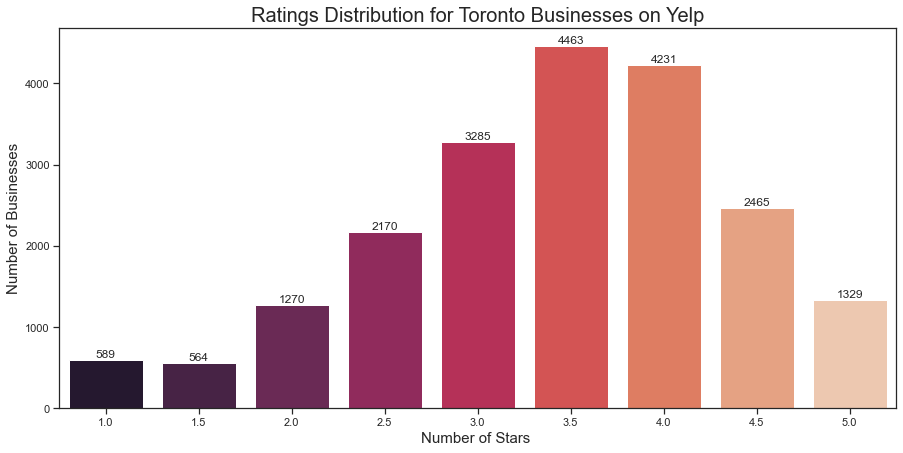

In [7]:
# Ratings distribution of Toronto Businesses on Yelp
tor = yelp_tor['stars'].value_counts()
tor = tor.sort_index()

#plot
plt.figure(figsize=(15, 7))
# same palette as before
ax= sns.barplot(x = tor.index, y = tor.values, palette = "rocket")
plt.title("Ratings Distribution for Toronto Businesses on Yelp", fontsize = 20)
plt.ylabel('Number of Businesses', fontsize=15)
plt.xlabel('Number of Stars ', fontsize=15)

#adding the text labels
rects = ax.patches
labels = tor.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#plt.savefig('figure_2.png', bbox_inches='tight')    
plt.show()

The distribution of the histogram reflects what the summary statistics had already alluded to previously. The most common rating for a business in Toronto is 3.5 stars, followed by 4 stars and 3 stars.

### Figure 3: Number of Reviews vs. Business Rating (Boxplots)

Having looked at each variable independent of one another, I can examine whether any relationship between the explanatory variables (location and number of reviews) and the response variable (business rating) exists. First, I create some box plots which examine Toronto businesses in the Yelp dataset with regards to the aforementioned explanatory variables.

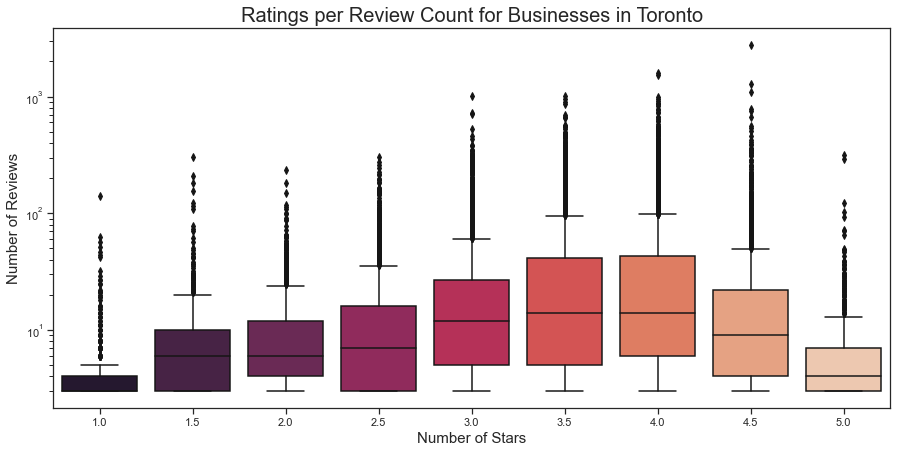

In [8]:
# Star Ratings Based on Number of Reviews for Toronto Businesses on Yelp
#plot
plt.figure(figsize=(15, 7))
ax = sns.boxplot(x = yelp_tor.stars, y = yelp_tor.review_count, palette = "rocket")
plt.title("Ratings per Review Count for Businesses in Toronto", fontsize = 20)
plt.yscale("log")
plt.ylabel('Number of Reviews', fontsize = 15)
plt.xlabel('Number of Stars', fontsize = 15)

#plt.savefig('figure_3.png')
plt.show()

Based on the plot above, there are a few observations that can be made. Firstly, the businesses that have the least number of reviews have either the highest rating (5 stars), or the lowest three ratings (1, 1.5, and 2 stars). There may be several reasons for this phenomenon, one being that it may be difficult for a business with many reviews to maintain a sky high rating. On the flip side, customers may be dissuaded from visiting a business with a super low rating already, and therefore be less likely to review the business.

The plot also shows that while the maximum (Q3 + 1.5 * IQR) number of reviews for a business in Toronto for all star levels is ~100 or less for each star rating, every star rating has several dozen outliers. This reaffirms the Pareto notion described earlier, which suggests that the majority of customer reviews are granted to a small minority (outliers) of businesses, regardless of the rating they are given.

### Figure 4: Location vs. Business Rating (Scatter Map)

In order to assess whether location plays any role in business ratings, I generate a "map" of toronto by creating a scatter plot of businesses on Yelp. Since latitude as an angle measures a locations' North-South position on Earth, and longitude as an angle measures a locations' East-West position on Earth, these variables are plotted as the y and x variables respectively below. As for a business' rating on Yelp, stars have been colour coordinated according to the legend on the left.

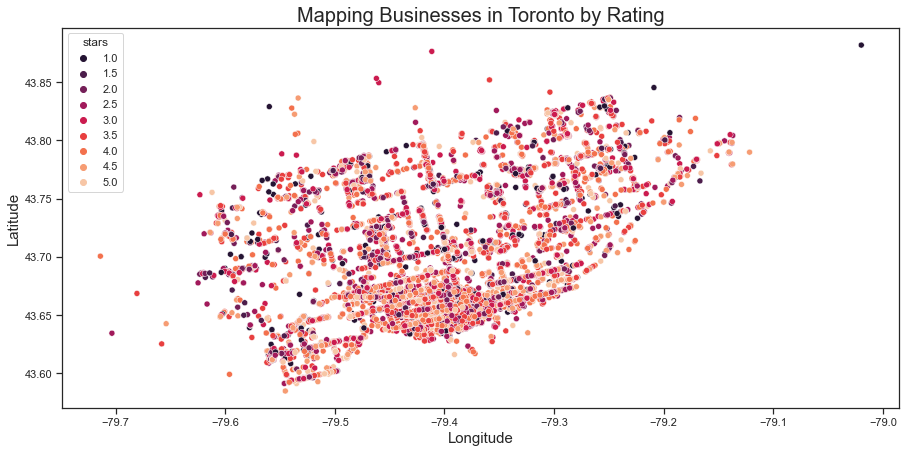

In [9]:
# Star Ratings Based on Number of Reviews for Toronto Businesses on Yelp
# same palette as before, 9 colours for 9 star categories
palette = sns.color_palette("rocket", 9)
plt.figure(figsize=(15, 7))
# scatterplot will form a shape of Toronto
ax = sns.scatterplot(x = yelp_tor.longitude, y = yelp_tor.latitude, palette = palette, hue = yelp_tor.stars)
plt.title("Mapping Businesses in Toronto by Rating", fontsize = 20)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
new_title = "Number of Stars"

#plt.savefig('figure_4.png')
plt.show()

### Figure 5: Location vs. Business Rating (Scatter Map Subplots)

Having plotted all of the businesses from the dataset above, I see a general shape of Toronto forming, with the curvature of the waterfront at the bottom and several intersecting straight lines of points resembling the city's grid-like nature. However, since there are so many data points, it might be easier to generate 9 different maps, one for each rating (from 1 star to 5 star). In the 3x3 grid below, ratings have been sorted from 1 star in the top left to 5 star in the bottom right.

Text(0.5, 1.0, '5 Star Businesses')

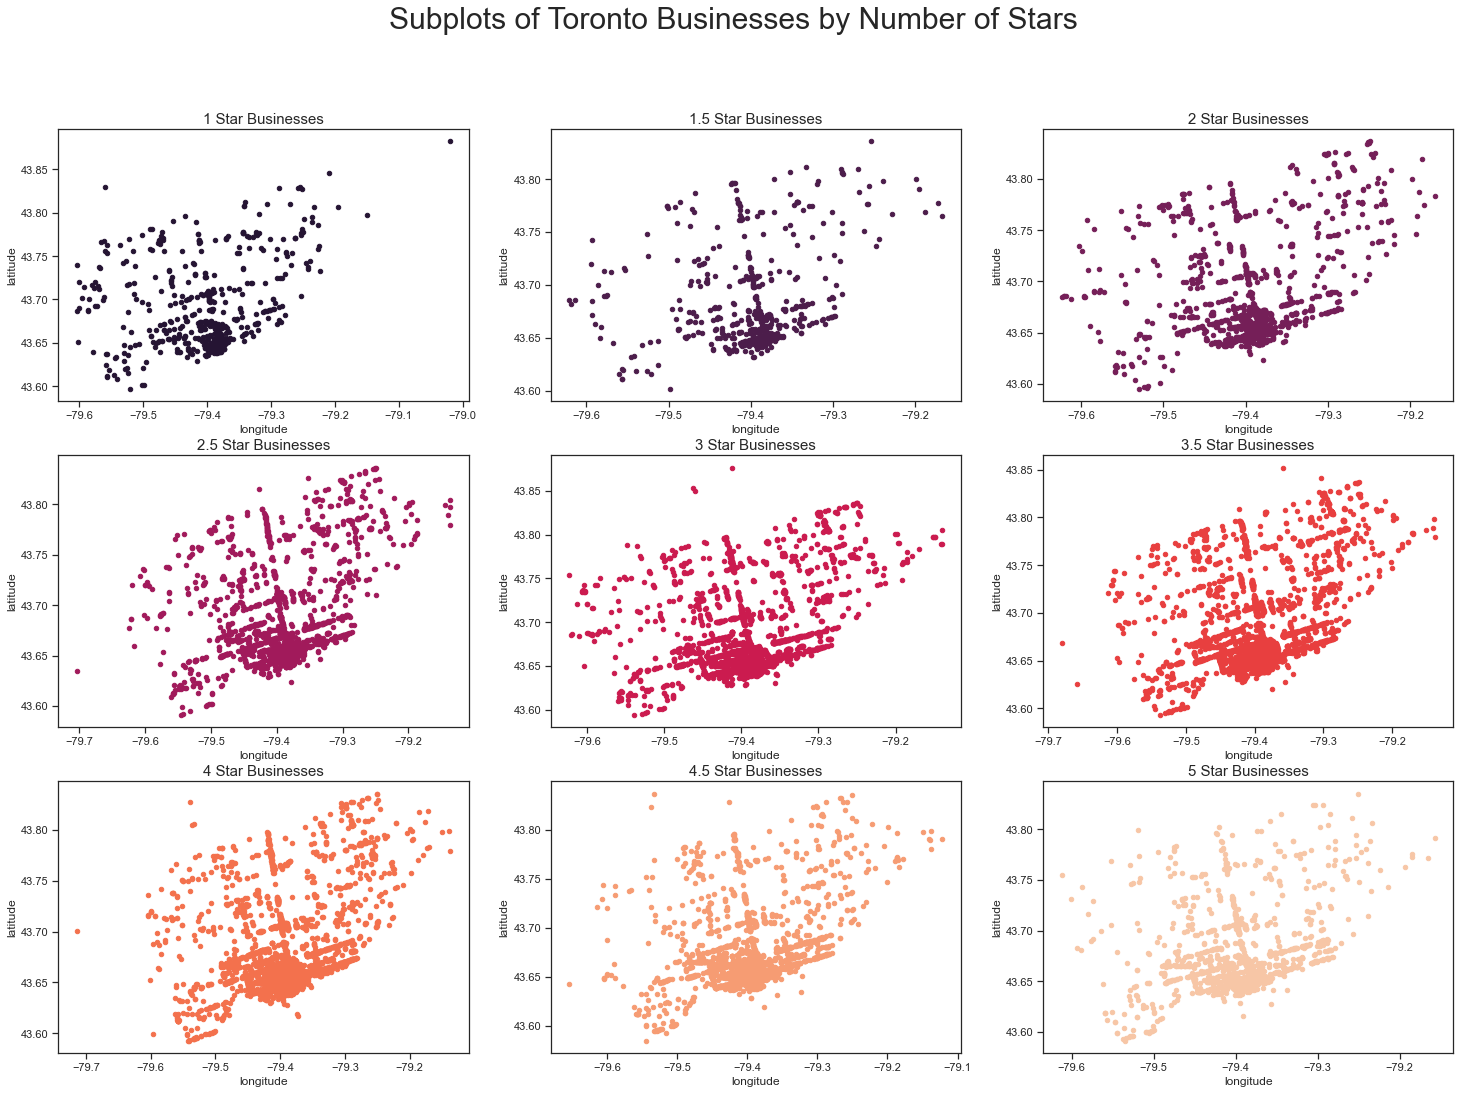

In [10]:
# same palette as before
palette = itertools.cycle(sns.color_palette("rocket", 9))
# 3x3 plot since there are 9 star categories (from 1 to 5 stars)
plots, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3, 3, figsize = (25, 17))

plots.suptitle("Subplots of Toronto Businesses by Number of Stars", fontsize = 30)

# 1 star businesses (same idea for the rest of the code chunks)
one_star = yelp_tor["stars"] == 1.0
one_star = yelp_tor[one_star]
one_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax1)
ax1.set_title("1 Star Businesses", fontsize = 15)

one_half_star = yelp_tor["stars"] == 1.5
one_half_star = yelp_tor[one_half_star]
one_half_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax2)
ax2.set_title("1.5 Star Businesses", fontsize = 15)

two_star = yelp_tor["stars"] == 2.0
two_star = yelp_tor[two_star]
two_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax3)
ax3.set_title("2 Star Businesses", fontsize = 15)

two_half_star = yelp_tor["stars"] == 2.5
two_half_star = yelp_tor[two_half_star]
two_half_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax4)
ax4.set_title("2.5 Star Businesses", fontsize = 15)

three_star = yelp_tor["stars"] == 3.0
three_star = yelp_tor[three_star]
three_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax5)
ax5.set_title("3 Star Businesses", fontsize = 15)

three_half_star = yelp_tor["stars"] == 3.5
three_half_star = yelp_tor[three_half_star]
three_half_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax6)
ax6.set_title("3.5 Star Businesses", fontsize = 15)

four_star = yelp_tor["stars"] == 4.0
four_star = yelp_tor[four_star]
four_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax7)
ax7.set_title("4 Star Businesses", fontsize = 15)

four_half_star = yelp_tor["stars"] == 4.5
four_half_star = yelp_tor[four_half_star]
four_half_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax8)
ax8.set_title("4.5 Star Businesses", fontsize = 15)

five_star = yelp_tor["stars"] == 5.0
five_star = yelp_tor[five_star]
five_star.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax9)
ax9.set_title("5 Star Businesses", fontsize = 15)

#plt.savefig('figure_5.png')

The 3x3 grid of maps above showcases the density of businesses in the downtown area of Toronto (the cluster around -79.4 degrees of longitude and 43.65 degrees of latitude). One observation that can be made is that there are very few 1 star rated businesses in the eastern half of Toronto (blue scatter). Another observation is that it seems as though many lower rated businesses exist in the western half of Toronto (i.e. the points between -79.7 and -79.6 degrees of longitude for every scatter plot).

### Figure 6: Location vs. Number of Reviews (Scatter Map Subplots)

I also create another set of 3x3 subplots categorizing businesses in Toronto based on a range of number of reviews on Yelp (e.g. Between 3 and 10, 11 and 25, 26 and 50, etc.).

Text(0.5, 1.0, 'More Than 1000 Reviews')

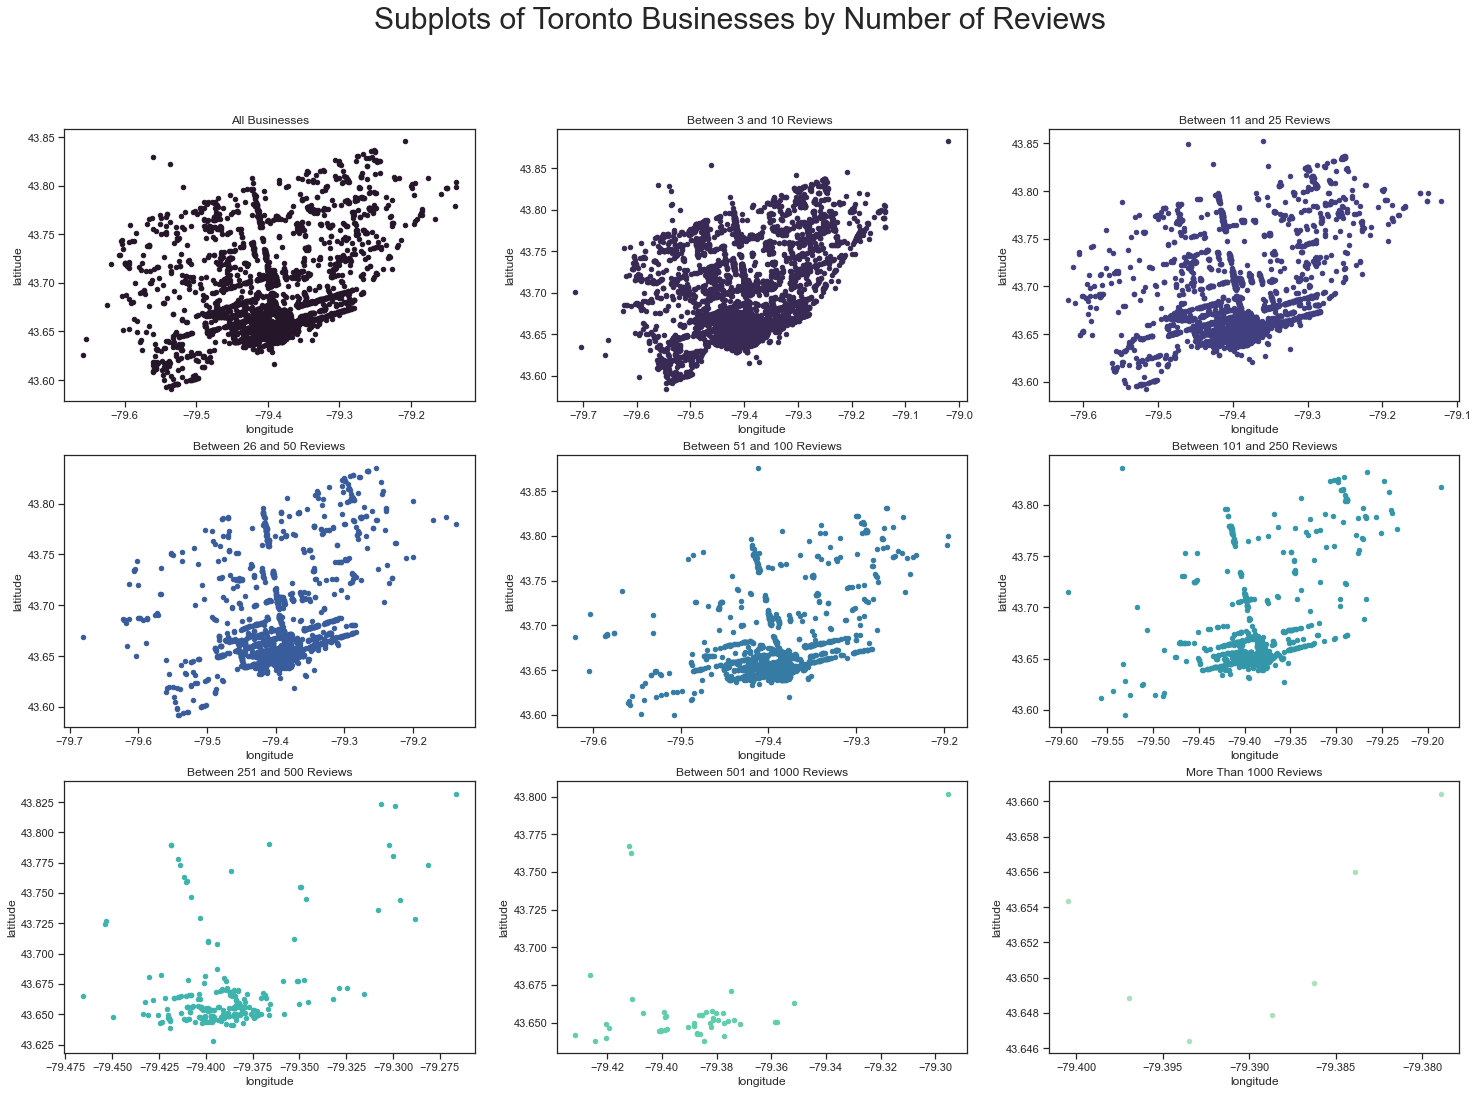

In [11]:
# using a different color palette since the number of stars a business has is not discussed
palette = itertools.cycle(sns.color_palette("mako", 9))
# 3x3 subplots look nice and the stratification of the number of reviews works well
plots, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3, 3, figsize = (25, 17))

plots.suptitle("Subplots of Toronto Businesses by Number of Reviews", fontsize = 30)

# all businesses in the dataset have a minimum of 3 Yelp reviews
all_reviews = yelp_tor["review_count"] <= 3
all_reviews = yelp_tor[all_reviews]
all_reviews.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax1)
ax1.set_title("All Businesses")

# businesses between 3 and 10 reviews (same idea for the rest of the code chunks)
reviews_one = yelp_tor[(yelp_tor["review_count"] >= 3) & (yelp_tor["review_count"] <= 10)]
reviews_one.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax2)
ax2.set_title("Between 3 and 10 Reviews ")

reviews_two = yelp_tor[(yelp_tor["review_count"] > 10) & (yelp_tor["review_count"] <= 25)]
reviews_two.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax3)
ax3.set_title("Between 11 and 25 Reviews")

reviews_three = yelp_tor[(yelp_tor["review_count"] > 25) & (yelp_tor["review_count"] <= 50)]
reviews_three.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax4)
ax4.set_title("Between 26 and 50 Reviews")

reviews_four = yelp_tor[(yelp_tor["review_count"] > 50) & (yelp_tor["review_count"] <= 100)]
reviews_four.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax5)
ax5.set_title("Between 51 and 100 Reviews")

reviews_five = yelp_tor[(yelp_tor["review_count"] > 100) & (yelp_tor["review_count"] <= 250)]
reviews_five.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax6)
ax6.set_title("Between 101 and 250 Reviews")

reviews_six = yelp_tor[(yelp_tor["review_count"] > 250) & (yelp_tor["review_count"] <= 500)]
reviews_six.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax7)
ax7.set_title("Between 251 and 500 Reviews")

reviews_seven = yelp_tor[(yelp_tor["review_count"] > 500) & (yelp_tor["review_count"] <= 1000)]
reviews_seven.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax8)
ax8.set_title("Between 501 and 1000 Reviews")

reviews_eight = yelp_tor["review_count"] > 1000
reviews_eight = yelp_tor[reviews_eight]
reviews_eight.plot(kind = "scatter", x = "longitude", y = "latitude", color = next(palette), ax = ax9)
ax9.set_title("More Than 1000 Reviews")

#plt.savefig('figure_6.png')

Figure 6 plots the location of Toronto businesses based on the number of reviews the business has. It makes intuitive sense that most businesses have very few reviews (between 3 and 10 reviews), and that the number of points on each subplot decreases as the number of reviews increases. There can only be so many popular business destinations, but it is interesting to note that the most reviewed businesses are not part of any particular community. There is a noticeable cluster of businesses in the western  part of the downtown core, but this pattern fades as the filter for number of reviews increases (i.e. the bottom right subplot). 

While Figure 6 look clean and provide some clarity as to how location is related to the number of reviews a Toronto business receives on Yelp, this set of plots has obvious limitations. In particular, the bottom row does not have enough data points to artificially generate an overall shape of Toronto, thereby making it more difficult to determine where a business' location is (i.e. it is very difficult to know where any of the businesses shown in the bottom right plot are located in Toronto.

## Project Two

### Reaffirming the Message of this Project
Whereas the first iteration of this project provided a rough estimation as how a business' rating relates to its location (longitude and latitude) and the number of reviews it gets on Yelp, the second iteration will look to provide a more in-depth analysis in two ways. 

The first way is to add a backdrop of the various wards of the city of Toronto. In the case of Figure 4 and Figure 5, adding a map backdrop will make it easier to interpret where individual businesses lie relative to one another. The second way is to generate an interactive map where all variable information is present. That is, a map that labels businesses by name, rating, number of reviews, and location. A rough draft combining these two ideas as one has been drawn below (Figure 7).

### Figure 7: Drafted Visualization (Interactive Map)

The image below depicts a rough idea of what I want my final findings to reflect. The plot should depict a coloured map of Toronto with borders for every ward. The colour of these wards can reflect a number of things, but for now should reflect the number of businesses within that ward that have been reviewed by Yelp (almost like a heat map). The plot should also be interactive in that when I place a cursor over a ward, I should be able to see its name, the average (or maybe total) number of reviews its businesses have, and the average rating a business has in its vicinity. These are prelimiary variables however, as merging this project with another dataset (e.g. household income by ward, crime indices, etc.) may lead to more fruitful findings. As for the axes, since the plot is a map, it should have longitude as the x-axis and latitude as the y-axis.

![](Figure_7.png "Yerp")

### Figure 8: Location vs. Business Rating (Scatter Map with Map Outline)

One way of resolving the issues of Figures 4 and 5 is to source a boundary file of Toronto, and use it as a backdrop upon which each individual businesses (the scatter points from above) can be shown. To do this, I import some datasets collected by Shirley Wang and Eva Huang from their Covid-19 UofT Virtual Datafest GitHub repository: https://github.com/DataFestUofT/submit-project-shirley_eva.

The datasets that are used include a shapefile of Toronto's wards, a csv file containing variable names, and another csv file containing socioeconomic data for each ward.

Since I already have a map with all Toronto businesses sorted by rating (Figure 4), the next step is to superimpose those data points onto a map of Toronto's wards to create a more detailed plot.

In [12]:
ward_map = gpd.read_file("City Wards Data.shp")
ward_map = ward_map[['FIELD_13', 'geometry']]
ward_map.columns = ['Ward', 'geometry']

ward_map.head()

Ward                                           geometry
0  Humber River-Black Creek  POLYGON ((-79.49105 43.76350, -79.49008 43.759...
1               York Centre  POLYGON ((-79.44043 43.76340, -79.43998 43.761...
2                Willowdale  POLYGON ((-79.39449 43.76157, -79.39461 43.761...
3       University-Rosedale  POLYGON ((-79.39004 43.69050, -79.39004 43.690...
4         Beaches-East York  POLYGON ((-79.29864 43.71515, -79.29837 43.714...

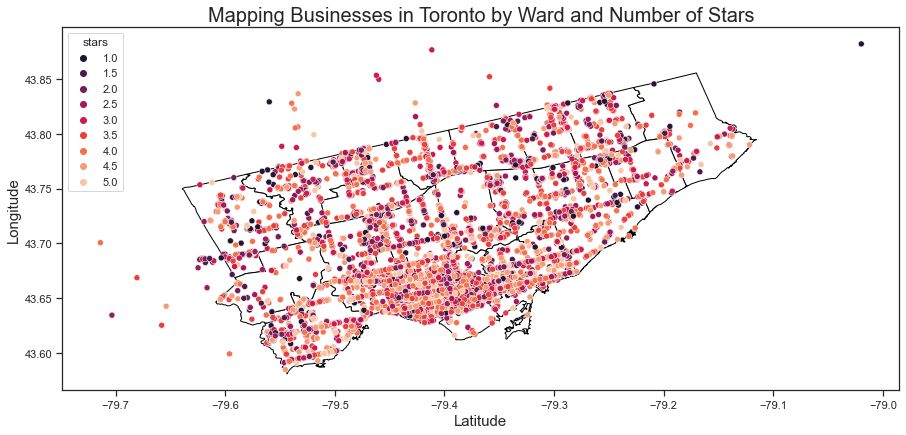

In [13]:
# Star Ratings Based on Number of Reviews for Toronto Businesses on Yelp
# same palette as before, 9 colours for 9 star rating categories 
palette = sns.color_palette("rocket", 9)

ward_map.plot(figsize = (15, 7), color = 'white', edgecolor = 'black')
plt.title("Mapping Businesses in Toronto by Ward and Number of Stars", fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Longitude", fontsize = 15)
# scatterplot will form a shape of Toronto
ax = sns.scatterplot(x = yelp_tor.longitude, y = yelp_tor.latitude, palette = palette, hue = yelp_tor.stars)

#plt.savefig('figure_8.png')
plt.show()

Figure 8 is essentially a more detailed version of Figure 4 from project one. Because one of the explanatory variables in this project is location, it reasons to use a boundary file to demarcate the location of Toronto businesses by community. Like figure 4, the color gradient of the plotted points labels businesses by its rating on Yelp. 

Clearly, there are some issues with the plot above. For starters, some of the businesses in the Yelp dataset are for businesses located outside of the official wards of Toronto. While this does not affect any of the findings in this notebook, it makes the plot somewhat unpleasant to read and difficult to interpret. Businesses are clustered too closely together, and ward borders are covered up by datapoints as well. Furthermore, figure 8 is limited in the sense that individual business information cannot be identified. 

While a still image of a map can be useful for identifying the general location and distribution of businesses, neither of those insights improve upon what has already been shown by other figures in the notebook thus far.

### Figure 9: Location vs. Business Rating and Number of Reviews (Interactive Map)

The only way to significantly improve upon the plots in this notebook is to generate an interactive map. With the help of  plotly, I have created an interactive map of Toronto with the following features. Of note, the rating of a business is still denoted by the colour of its marker, whereas the number of reviews it has is denoted by the size of its marker. Furthermore, highlighting over a business shows its longitude, latitude, and name. By zooming into a particular area of the map, one can also identify the name of the ward they are looking at. 

In [14]:
fig = px.scatter_mapbox(yelp_tor, lat = "latitude", lon = "longitude", 
                        color = "stars", size = "review_count", text = "name", 
                        color_continuous_scale = px.colors.sequential.Magma, 
                        size_max=15, zoom=10, mapbox_style = "carto-positron", 
                        title = "Mapping Toronto Businesses by Rating and Number of Reviews")

#plt.savefig('figure_9.png')
fig.show()

Figure 9 is able to cleanly plot and describe all of the variables of interest in this project (that is, names of businesses, number of reviews, rating, and location). As for interpreting the findings of Figure 9, the western part of the downtown core of Toronto is unsurprisingly the most frequented area for Yelp reviewees (as confirmed by Figure 6). In particular, streets like Queen St. West, Spadina Ave., and Bloor St. West are densely populated with popular businesses (larger bubbles). As for businesses with higher star ratings (lighter coloured bubbles), the distribution remains relatively balanced (as evidenced by Figure 5). Although this map does not necessarily confirm any new patterns or relationships between a business' location, number of reviews, and rating, it does provide an easier way to interpret the variables on their own (and in conjunction with one another). 

## Project Three

### Introducing Webscraping

The third iteration of this project focuses on incorporating more data to generate a more comprehensive explanatory location (ward) variable. Webscraping is an excellent way of including more detailed data to the preexisting dataset. Until now, I have created several maps plotting businesses by the number of reviews and rating they have on Yelp. While I have shown some interesting results, I can formulate a more rigourous analysis by looking whether similar wards share similar business characteristics. 

Under project two, I mentioned that I had sourced a dataset containing socioeconomic data for all 25 wards in Toronto. A glimpse of the data is shown below. In the analysis to come, we will focus on the income and labour statistics from the dataset.

In [15]:
ward_income_labour = pd.read_csv('wardsocioeconomic.csv')
ward_income_labour = ward_income_labour.drop(columns = ["Source", "Employed", "Not in the Labour force", "Unemployed"])
ward_income_labour.head()

Ward Average Individual Income  \
0      Etobicoke North                       Low   
1     Etobicoke Centre                       Mid   
2  Etobicoke-Lakeshore                       Mid   
3   Parkdale-High Park                       Mid   
4    York South-Weston                       Low   

   Greater than Toronto Unemployment  Unemployment Rate  \
0                              False              0.106   
1                              False              0.072   
2                               True              0.068   
3                               True              0.068   
4                              False              0.094   

   Average Household Income  
0                     73374  
1                    128448  
2                    105994  
3                     99784  
4                     67954

There are several variables of interest that may have some correlation to a business' rating on Yelp. For instance, a business located a ward with a high average household income may have a higher star rating on average because of the wealth of the neighbourhood and the higher expectations of its inhabitants. Likewise, a business in a poorer ward stricken by higher rates of unemployment may have lower rated businesses on average.

It is unclear, however, whether any of these measurements will be able to accurately explain the number of reviews a particular business receives. Because I have been looking at the raw number of reviews a business receives, any population-specific statistics would be an obvious place to continue the analysis. The population data of each Toronto ward can be found on the "Demographics of Toronto" Wikipedia entry at the following address: https://en.wikipedia.org/wiki/Demographics_of_Toronto.

A quick examination of the article lets me know that there are several tables from which data can be scrapped. Many of these tables contain variables that are beyond the scope of this paper, such as race, ethnic origin, and language (I only want to scrape overall population figures). 

I find that the population figures are split into four tables based on region (Toronto & East York, North York, Scarborough, and Etobicoke & York). While this does not raise the level of difficulty for the webscraping to come, it does make it more time-consuming. Wikipedia tables in general are well-formatted, and there are several tutorials available online that make webscraping from its articles a painless endeavor.  

In the following few blocks of code, I use Python's requests and Beautiful Soup packages to run some HTML-based webscraping. 

### Webscraping Population Data

In [16]:
# do wards with higher populations have businesses with mroe reviews on Yelp?
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Set the URL you want to webscrape from
url = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto'

# Connect to the URL
response = requests.get(url)

print('Status code\n', response.status_code)
#print('\n--\n')
#print('Content of the website\n', response.content[:2000])

Status code
 200


In [17]:
# Following the code from the lecture
soup_object = BeautifulSoup(response.text, "html.parser")
#soup_object

Because there are several tables in the Wikipedia article, I need to specify which table(s) I want to scrape from. A quick inspection of the html data lets me know that I need to look at the following four tables. Further analysis lets me know that row values for the tables of interest are enclosed under the \<tr> HTML tag.

In [18]:
# toronto and east york population
data_table_1 = soup_object.find_all('table', 'wikitable sortable')[5]
# north york
data_table_2 = soup_object.find_all('table', 'wikitable sortable')[6]
# scarborough
data_table_3 = soup_object.find_all('table', 'wikitable sortable')[7]
# etobicoke and york
data_table_4 = soup_object.find_all('table', 'wikitable sortable')[8]

In [19]:
all_values_1 = data_table_1.find_all('tr')
all_values_2 = data_table_2.find_all('tr')
all_values_3 = data_table_3.find_all('tr')
all_values_4 = data_table_4.find_all('tr')
#all_values_1[:1]

Once the data has been assigned to the four "all_values" variables, I iterate through each element of the list using a for loop to extract the name and population of all of Toronto's wards. Since there are four tables, I have to run similar code four times. 

In [20]:
ward_pop_1 = pd.DataFrame(columns = ['Ward', 'Population']) 

ix = 0 # Initialise index to zero

for row in all_values_1[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    name = values[0].text.strip('\n')
    population = values[1].text.strip('\n')
   
    
    ward_pop_1.loc[ix] = [name, population] # Store it in the dataframe as a row
    ix += 1
    
    
ward_pop_2 = pd.DataFrame(columns = ['Ward', 'Population']) 

ix = 0 # Initialise index to zero

for row in all_values_2[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    name = values[0].text.strip('\n')
    population = values[1].text.strip('\n')
   
    
    ward_pop_2.loc[ix] = [name, population] # Store it in the dataframe as a row
    ix += 1
    
    
ward_pop_3 = pd.DataFrame(columns = ['Ward', 'Population']) 

ix = 0 # Initialise index to zero

for row in all_values_3[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    name = values[0].text.strip('\n')
    population = values[1].text.strip('\n')
   
    
    ward_pop_3.loc[ix] = [name, population] # Store it in the dataframe as a row
    ix += 1
    
ward_pop_3.head()


ward_pop_4 = pd.DataFrame(columns = ['Ward', 'Population']) 

ix = 0 # Initialise index to zero

for row in all_values_4[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    name = values[0].text.strip('\n')
    population = values[1].text.strip('\n')
   
    
    ward_pop_4.loc[ix] = [name, population] # Store it in the dataframe as a row
    ix += 1

Just like that, I have scraped population data from four different Wikipedia tables and reorganized them into their own dataframes. While this process is seamless and relatively straightforward for 

### Incorporating the Webscraped Data with New Data

After scraping, collecting, and converting the population data from Wikipedia into four dataframes, I concatenate them together to form one large dataframe called 'ward_pop'. This dataframe is merged with the socioeconomic ward data collected by Wang and Huang before being concatenated with the geographic data of each ward. The end result is a dataframe called 'ward_tor'.

In [21]:
# concatenating the four ward population dataframes into one
ward_pop = pd.concat([ward_pop_1, ward_pop_2, ward_pop_3, ward_pop_4], ignore_index = True)

# converting the population data to a number
ward_pop['Population'] = ward_pop['Population'].str.replace(',', '')
ward_pop['Population'] = ward_pop['Population'].astype(int)

# merging population data with income and labour data
ward_demos = pd.merge(ward_income_labour, ward_pop, on = "Ward")

# combining the population, socioeconomic, and geographic data for each ward into one dataframe
ward_tor = pd.merge(ward_demos, ward_map, on = "Ward")

ward_tor.head()

Ward Average Individual Income  \
0      Etobicoke North                       Low   
1     Etobicoke Centre                       Mid   
2  Etobicoke-Lakeshore                       Mid   
3   Parkdale-High Park                       Mid   
4    York South-Weston                       Low   

   Greater than Toronto Unemployment  Unemployment Rate  \
0                              False              0.106   
1                              False              0.072   
2                               True              0.068   
3                               True              0.068   
4                              False              0.094   

   Average Household Income  Population  \
0                     73374      116960   
1                    128448      116055   
2                    105994      127520   
3                     99784      106445   
4                     67954      115130   

                                            geometry  
0  POLYGON ((-79.57938 43.76222, -79.57925 43.762...  
1  POLYGON ((-79.52766 43.70120, -79.52597 43.701...  
2  POLYGON ((-79.49777 43.65198, -79.49725 43.651...  
3  POLYGON ((-79.46934 43.66730, -79.46615 43.667...  
4  POLYGON ((-79.46935 43.70868, -79.46888 43.706...

Now that all three ward-related dataframes have been combined into 'ward_tor', I need to classify each business in the original yelp dataset by the ward it resides in. Recall that each business in the yelp dataset has a longitude and latitude, and that each ward has a 'POLYGON' object which helps demarcate its borders. The next step is to determine whether the longitude and latitude of a business falls within the geometry of each ward shown above. 

To do this, I start by appending a column to 'ward_tor' called 'geomlist', which takes the 'POLYGON' object from the 'geometry' column and converts it to a list. From there, I create a function which determines whether a point lies within the shape boundary of a particular ward. The function accepts a latitude and longitude (from the Yelp dataset), and the geomlist of coordinates which makes up the polygon shape of a ward. The following code is adopted from a Medium publication by Amy Gordon linked here: https://medium.com/dataexplorations/working-with-open-data-shape-files-using-geopandas-how-to-match-up-your-data-with-the-areas-9377471e49f2. 

In [22]:
ward_tor['geomlist'] = ward_tor['geometry'].apply(lambda x: list(x.exterior.coords))

In [23]:
def point_in_poly(latitude, longitude, polygon):
    # returns True if the map coordinates of a point of interest falls within
    # its mapped borders
    n = len(polygon)
    inside = False
    
    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if latitude > min(p1y, p2y):
            if latitude <= max(p1y,p2y):
                if longitude <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (latitude - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or longitude <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
        
    return inside

To test out the function, I input the coordinates of my favourite pizza shop in the city which is located in University-Rosedale.

In [24]:
yelp_tor.loc[yelp_tor['name'] == "Fresca Pizza & Pasta"]
# latitude: 43.657809
# longitude: -79.401721

name     city state   latitude  longitude  stars  \
2903  Fresca Pizza & Pasta  Toronto    ON  43.657809 -79.401721    4.0   

      review_count  
2903           110

In [25]:
# Test 1:
# the following test should return False, because Fresca is not located in 
# Etobicoke North (the ward listed at index 0 in the ward_map dataframe)
poly = ward_tor.loc[0, 'geomlist']
lat = 43.657809
lng = -79.401721
point_in_poly(lat, lng, poly)

False

In [26]:
# Test 2:
# the following test should return True, because Fresca is located in
# University-Rosedale (the ward listed at index 10 in the ward_map dataframe)
poly = ward_tor.loc[10, 'geomlist']
lat = 43.657809
lng = -79.401721
point_in_poly(lat, lng, poly)

True

Now that I have some confidence in the mapping function, I can apply it to the rest of the Yelp dataset with the 'get_ward' function defined below. 

In [27]:
def get_ward(row):
    for ix, ward in ward_tor.iterrows():
        is_in_ward = False
        if row['latitude'] and row['longitude']:
            is_in_ward = point_in_poly(row['latitude'], row['longitude'], ward['geomlist'])
            if is_in_ward:
                #found area, exit
                return ward['Ward']
    return ""

yelp_tor['Ward'] = yelp_tor.apply(lambda row: get_ward(row), axis = 1)

C:\Users\Neelansh Visen\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# removing any businesses that do not fit into the 25 wards of Toronto
nan_value = float("NaN")
# convert NaN values to empty string
yelp_tor.replace('', nan_value, inplace=True)
yelp_tor.dropna(subset = ['Ward'], inplace=True)

yelp_tor.head()

C:\Users\Neelansh Visen\anaconda3\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Neelansh Visen\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name     city state   latitude  longitude  stars  \
9           Xtreme Couture  Toronto    ON  43.624539 -79.529108    3.0   
26        Air Jordan Store  Toronto    ON  43.656542 -79.381308    4.0   
29     Front Door Organics  Toronto    ON  43.603232 -79.538424    4.0   
38  Gourmet Burger Company  Toronto    ON  43.633291 -79.531768    3.0   
52     Bath and Body Works  Toronto    ON  43.727189 -79.293008    3.5   

    review_count                 Ward  
9             16  Etobicoke-Lakeshore  
26             9  University-Rosedale  
29             8  Etobicoke-Lakeshore  
38            13  Etobicoke-Lakeshore  
52             7   Scarborough Centre

In [29]:
# of the 25 wards in Toronto, only 17 of them are represented in the Yelp dataset
yelp_tor['Ward'].unique()

array(['Etobicoke-Lakeshore', 'University-Rosedale', 'Scarborough Centre',
       'Toronto-Danforth', 'Scarborough-Rouge Park', 'Willowdale',
       'Spadina-Fort York', 'York Centre', 'Don Valley East',
       'Beaches-East York', "Toronto-St. Paul's", 'Etobicoke North',
       'Toronto Centre', 'Scarborough Southwest', 'Don Valley North',
       'Don Valley West', 'York South-Weston', 'Eglinton-Lawrence',
       'Parkdale-High Park', 'Scarborough-Agincourt', 'Davenport',
       'Scarborough North', 'Etobicoke Centre',
       'Humber River-Black Creek', 'Scarborough-Guildwood'], dtype=object)

To summarize the work of this section of the notebook, I now find myself working with two datasets. 'yelp_tor' contains the Yelp data for business around Toronto, and now includes the city ward in which each business resides. 'ward_tor' contains webscraped data (population figures), income, and labour statistics for each ward. 

The importance of collecting all of the data before visualizing is important because it leaves little room for error (e.g. misusing an older dataset). Moving forward, these two datasets will be used in conjunction with one another to further explain the general trends between the original variables of interest. That is, whether there exists any relationship between the location of a business, the number of reviews it has, and its rating on Yelp.

There are some important points to note before moving forward in the analysis. Namely, that several businesses have been removed from the 'yelp_tor' dataset. Having examined the original 'yelp_tor' dataset further, it turns out that some businesses classified as part of "Toronto" fall out of the city's official borders. This sentiment aligns with some of the maps made earlier, namely Figure 8, where I can clearly see that some datapoints fall outside of the imposed map outline. Moving forward, these businesses will be ignored from the analysis, as they fall outside of the scope of the project.

Now that I have population, income, and labour statistics, I can continue the analysis by looking at whether there exists any trend between the characteristics of a business' ward, the average number of reviews a business has in a particular ward, and the average rating of a business in a particular ward. 

### Figure 10: Ward Population vs. Number of Reviews

Looking at population first, it reasons that a ward with a greater population may have businesses with more reviews, since they cater to a larger customer base. To examine whether any such relationship exists, I order the wards by population (lowest to highest from left to right) and draw a barplot for the median number of reviews each ward's businesses have. If there exists a relationship, then I would expect there to be a slight upward trend in the bar plot plotted below. 

In [30]:
# ordering wards by population (low to high)
ward_tor.sort_values(by = ['Population'], ascending = True, inplace = True)
ward_tor["Ward"].unique()

array(['Don Valley East', 'Scarborough North', 'Toronto Centre',
       'University-Rosedale', 'Scarborough-Guildwood',
       'Scarborough-Rouge Park', 'Don Valley West', 'York Centre',
       'Scarborough-Agincourt', "Toronto-St. Paul's", 'Toronto-Danforth',
       'Parkdale-High Park', 'Davenport', 'Humber River-Black Creek',
       'Scarborough Southwest', 'Beaches-East York', 'Don Valley North',
       'Scarborough Centre', 'Eglinton-Lawrence', 'Spadina-Fort York',
       'York South-Weston', 'Etobicoke Centre', 'Etobicoke North',
       'Willowdale', 'Etobicoke-Lakeshore'], dtype=object)

In [31]:
pop_order = ['Don Valley East', 'Scarborough North', 'Toronto Centre',
       'University-Rosedale', 'Scarborough-Guildwood',
       'Scarborough-Rouge Park', 'Don Valley West', 'York Centre',
       'Scarborough-Agincourt', "Toronto-St. Paul's", 'Toronto-Danforth',
       'Parkdale-High Park', 'Davenport', 'Humber River-Black Creek',
       'Scarborough Southwest', 'Beaches-East York', 'Don Valley North',
       'Scarborough Centre', 'Eglinton-Lawrence', 'Spadina-Fort York',
       'York South-Weston', 'Etobicoke Centre', 'Etobicoke North',
       'Willowdale', 'Etobicoke-Lakeshore']

Text(0, 0.5, 'Number of Reviews')

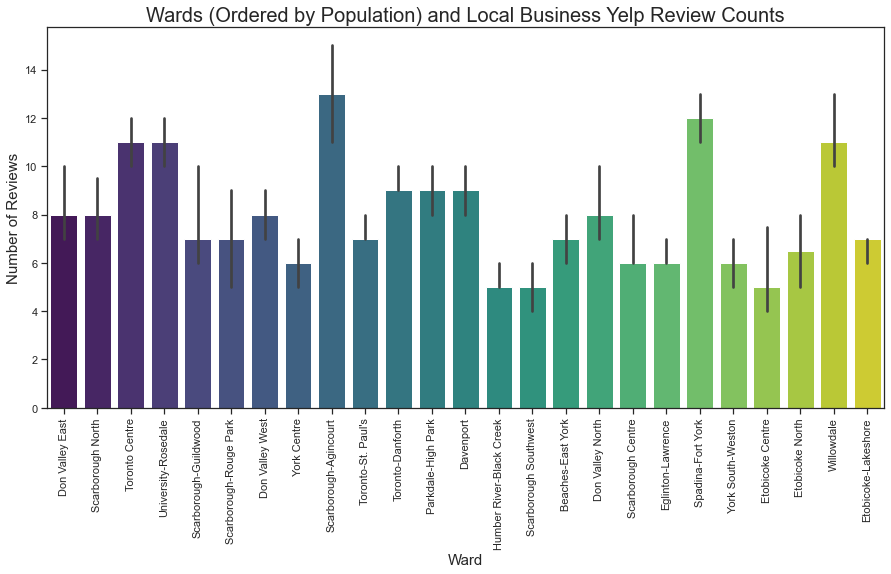

In [32]:
from numpy import median

# creating a barplot to show whether ward population has any impact on review count
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
ax = sns.barplot(x = "Ward", y = "review_count", order = pop_order, 
                 estimator = median, palette = 'viridis', data = yelp_tor)
plt.title("Wards (Ordered by Population) and Local Business Yelp Review Counts", fontsize = 20)
plt.xlabel("Ward", fontsize = 15)
plt.ylabel("Number of Reviews", fontsize = 15)

#plt.savefig('figure_10.png', bbox_inches='tight')

According to Figure 10, Toronto's citizens can expect to find popular destinations all over town. Certain areas, like Toronto-Centre, University-Rosedale, Scarborough-Agincourt, Spadina-Fort-York, and Willowdale appear to have more businesses with a high number of reviews than others, despite their relatively different population sizes. Looking across the board, however, there appears to be no discernible pattern between the population of a ward and the number of reviews its businesses receive on Yelp. 

If a ward's population does play any role in determining the number of reviews a business has on Yelp, then the relationship must depend on a particular subset or demographic of the population and not the overall total. Intuitively, this makes sense, since not all population groups visit the same businesses nor contribute to Yelp the same. As a social medium, I surmise that the average Yelp user is likely a younger adult (e.g. student or young professional). On average, I posit that they have more time to visit local businesses and therefore more time to review on Yelp as well.

### Figure 11: Ward Income vs. Number of Reviews

Having ordered the wards by population, the next variable of interest that I look at it is the average household income per ward. Income, as a proxy for customer expectations and overall marketplace competition, may be able to reflect that certain wards have more popular businesses on average. 

As I did with population, I begin by ordering Toronto's wards by average household income (lowest to highest from left to right). I then take the median number of reviews of a business in a particular ward and plot them in a bar chart below. Like before, an upward slope of the bar charts would indicate some positive relationship between the average wealth of a ward's inhabitant and the popularity of its local businesses. 

In [33]:
# ordering wards by income (low to high)
ward_tor.sort_values(by = ['Average Household Income'], ascending = True, inplace = True)
ward_tor["Ward"].unique()

array(['Humber River-Black Creek', 'York South-Weston',
       'Scarborough-Guildwood', 'Etobicoke North', 'Toronto Centre',
       'Scarborough-Agincourt', 'Scarborough Southwest',
       'Scarborough North', 'Don Valley East', 'Davenport', 'Willowdale',
       'Don Valley North', 'York Centre', 'Scarborough-Rouge Park',
       'Parkdale-High Park', 'Toronto-Danforth', 'Scarborough Centre',
       'Spadina-Fort York', 'Etobicoke-Lakeshore', 'Beaches-East York',
       'Etobicoke Centre', 'Don Valley West', "Toronto-St. Paul's",
       'Eglinton-Lawrence', 'University-Rosedale'], dtype=object)

In [34]:
income_order = ['Humber River-Black Creek', 'York South-Weston',
       'Scarborough-Guildwood', 'Etobicoke North', 'Toronto Centre',
       'Scarborough-Agincourt', 'Scarborough Southwest',
       'Scarborough North', 'Don Valley East', 'Davenport', 'Willowdale',
       'Don Valley North', 'York Centre', 'Scarborough-Rouge Park',
       'Parkdale-High Park', 'Toronto-Danforth', 'Scarborough Centre',
       'Spadina-Fort York', 'Etobicoke-Lakeshore', 'Beaches-East York',
       'Etobicoke Centre', 'Don Valley West', "Toronto-St. Paul's",
       'Eglinton-Lawrence', 'University-Rosedale']

Text(0, 0.5, 'Number of Reviews')

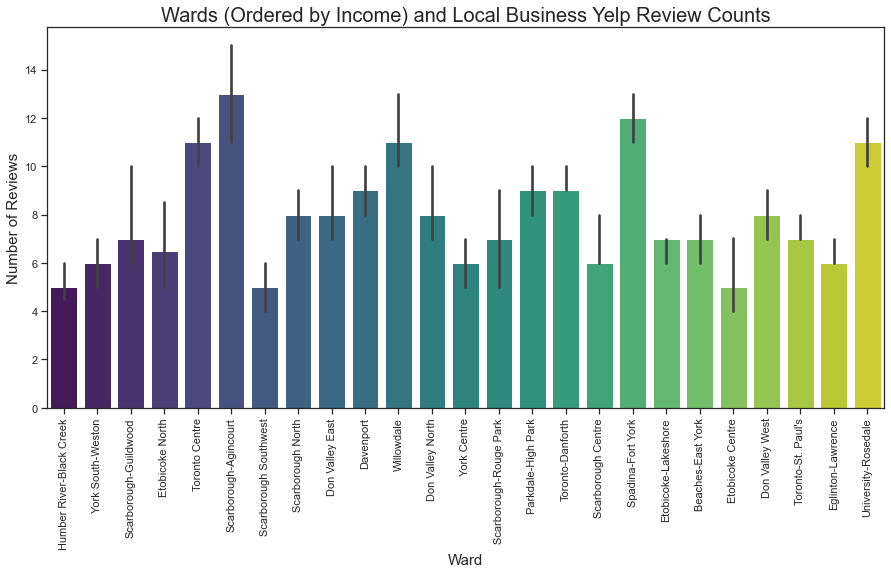

In [35]:
# creating a barplot to show whether ward income has any impact on review count
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
ax = sns.barplot(x = "Ward", y = "review_count", order = income_order, 
                 estimator = median, palette = 'viridis', data = yelp_tor)
plt.title("Wards (Ordered by Income) and Local Business Yelp Review Counts", fontsize = 20)
plt.xlabel("Ward", fontsize = 15)
plt.ylabel("Number of Reviews", fontsize = 15)

#plt.savefig('figure_11.png', bbox_inches='tight')

Like before, there appears to be no relationship between this particular ward statistic and a business' rating on Yelp. To round off this section of the analysis, I compose a third bar plot below, this time using the data I have on ward unemployment rates. 

### Figure 12: Ward Unemployment vs. Number of Reviews

Wards are ordered by unemployment rates (highest to lowest from left to right), and are plotted against the median number of reviews of its businesses. 

In [36]:
# ordering wards by unemployment rate (high to low)
# ordering wards by income (low to high)
ward_tor.sort_values(by = ['Unemployment Rate'], ascending = False, inplace = True)
ward_tor["Ward"].unique()

array(['Scarborough-Guildwood', 'Humber River-Black Creek',
       'Etobicoke North', 'Scarborough-Agincourt', 'Scarborough North',
       'Scarborough Southwest', 'York South-Weston', 'Don Valley East',
       'Don Valley North', 'Scarborough-Rouge Park', 'Toronto Centre',
       'Willowdale', 'Eglinton-Lawrence', 'University-Rosedale',
       'Etobicoke Centre', 'Davenport', 'Parkdale-High Park',
       'Toronto-Danforth', 'Etobicoke-Lakeshore', 'York Centre',
       'Don Valley West', "Toronto-St. Paul's", 'Scarborough Centre',
       'Beaches-East York', 'Spadina-Fort York'], dtype=object)

In [37]:
unemployment_order = ['Scarborough-Guildwood', 'Humber River-Black Creek',
       'Etobicoke North', 'Scarborough-Agincourt', 'Scarborough North',
       'Scarborough Southwest', 'York South-Weston', 'Don Valley East',
       'Don Valley North', 'Scarborough-Rouge Park', 'Toronto Centre',
       'Willowdale', 'Eglinton-Lawrence', 'University-Rosedale',
       'Etobicoke Centre', 'Davenport', 'Parkdale-High Park',
       'Toronto-Danforth', 'Etobicoke-Lakeshore', 'York Centre',
       'Don Valley West', "Toronto-St. Paul's", 'Scarborough Centre',
       'Beaches-East York', 'Spadina-Fort York']

Text(0, 0.5, 'Number of Reviews')

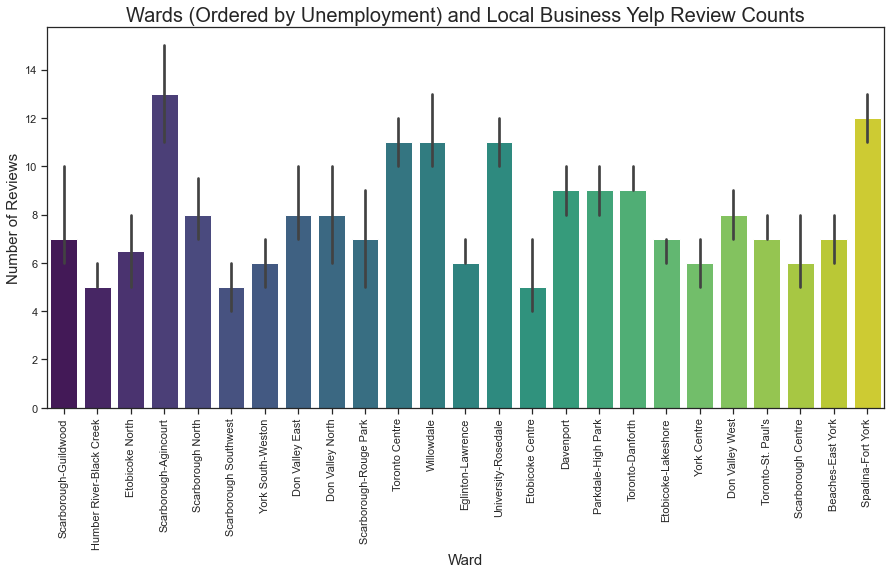

In [38]:
# creating a barplot to show whether ward unemployment rate has any impact on review count
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
ax = sns.barplot(x = "Ward", y = "review_count", order = unemployment_order, 
                 estimator = median, palette = 'viridis', data = yelp_tor)
plt.title("Wards (Ordered by Unemployment) and Local Business Yelp Review Counts", fontsize = 20)
plt.xlabel("Ward", fontsize = 15)
plt.ylabel("Number of Reviews", fontsize = 15)

#plt.savefig('figure_12.png', bbox_inches='tight')

As was the case with income, there appears to be no relationship between a ward's unemployment rate and the median number of reviews its businesses has. Due of the inconclusive nature of the last three plots, it reasons that some external factors must be influencing the number of reviews a business receives on Yelp.

If none of the general ward demographic statistics play any role in determining the number of reviews a business has on Yelp, then the popularity of a business may depend on certain unaccounted-for statistics. For example, the rating a business already has (which we have already examined), how a business accommodates/treats its customers, and overall quality of service (especially in the case of something like a restaurant) may all be contributing factors to the popularity and thus number of reviews it receives on Yelp. 

This does not completely discount the usability of the ward data, however, because I can use a similar method as before and plot business ratings by ward. The code for the following three figures is nearly identical to that of the previous three barring the exchange of mean for median. Median was an appropriate proxy for average when looking at the the number of reviews because of the skewed distribution of the review counts (see: Figure 1). Mean is better suited for the somewhat normal distribution of business ratings (see: Figure 2).

Because of the repetitive nature of this particular section, I will save my explanation until after the following three charts have been plotted.

### Figure 13: Ward Population vs. Business Rating

Text(0, 0.5, 'Number of Stars')

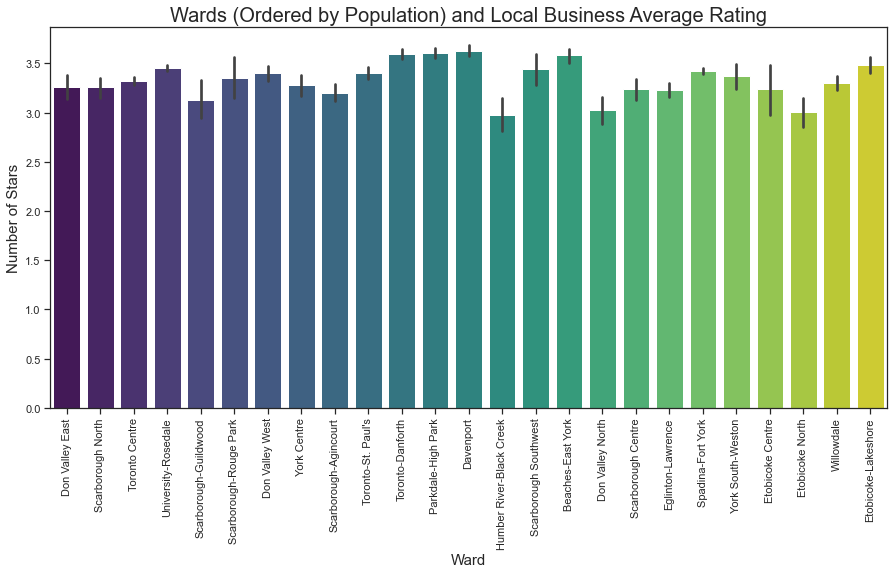

In [39]:
from numpy import mean
# creating a barplot to show whether ward population has any impact on the average rating of a business
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
ax = sns.barplot(x = "Ward", y = "stars", order = pop_order, 
                 estimator = mean, palette = 'viridis', data = yelp_tor)
plt.title("Wards (Ordered by Population) and Local Business Average Rating", fontsize = 20)
plt.xlabel("Ward", fontsize = 15)
plt.ylabel("Number of Stars", fontsize = 15)

#plt.savefig('figure_13.png', bbox_inches='tight')

### Figure 14: Ward Income vs. Business Rating

Text(0, 0.5, 'Number of Stars')

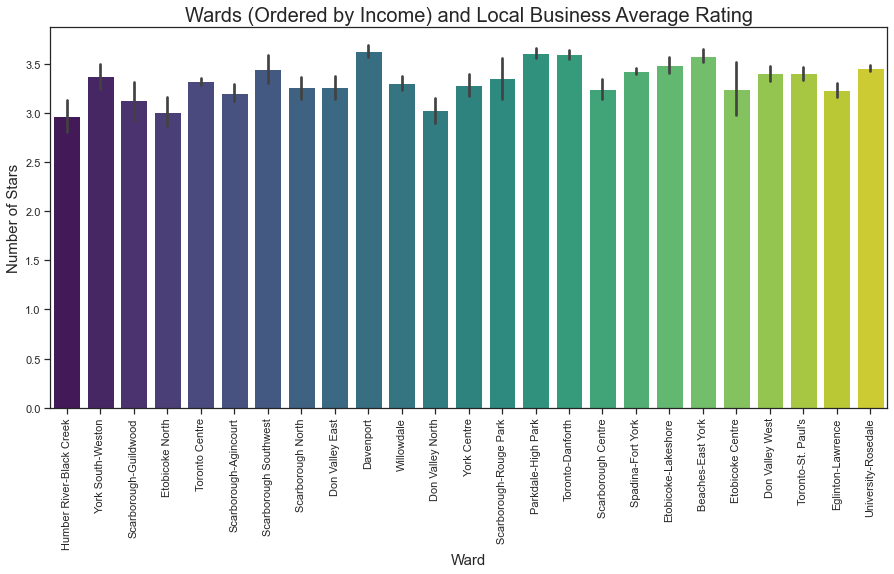

In [40]:
# creating a barplot to show whether ward income has any impact on the average rating of a business
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
ax = sns.barplot(x = "Ward", y = "stars", order = income_order, 
                 estimator = mean, palette = 'viridis', data = yelp_tor)
plt.title("Wards (Ordered by Income) and Local Business Average Rating", fontsize = 20)
plt.xlabel("Ward", fontsize = 15)
plt.ylabel("Number of Stars", fontsize = 15)

#plt.savefig('figure_14.png', bbox_inches='tight')

### Figure 15: Ward Unemployment vs. Business Rating

Text(0, 0.5, 'Number of Stars')

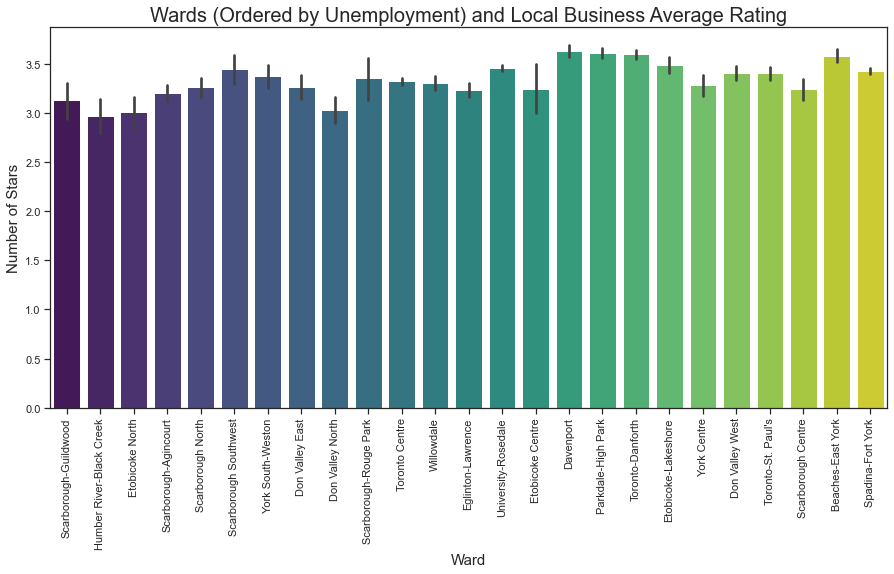

In [41]:
# creating a barplot to show whether ward unemployemnt rate has any impact on the average rating of a business
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
ax = sns.barplot(x = "Ward", y = "stars", order = unemployment_order, 
                 estimator = mean, palette = 'viridis', data = yelp_tor)
plt.title("Wards (Ordered by Unemployment) and Local Business Average Rating", fontsize = 20)
plt.xlabel("Ward", fontsize = 15)
plt.ylabel("Number of Stars", fontsize = 15)

#plt.savefig('figure_15.png', bbox_inches='tight')

Even when I look at the average rating of a business in any given ward, the additional community demographics that have been added to this analysis seem to have little to no statistical significance. Looking at Figure 13, there is virtually no upward trend between the population of a ward and its average business rating. This makes sense, as the number of people visiting a business should not dramatically change the product of a business and the way they manage their clientele.

Perhaps more surprising is that income and unemployment levels appear to have little to no effect on a ward's average business rating. It would make sense that a business in York South-Weston, a ward with an average household income of 67954 CAD, would have lower standards of service than a business from University-Rosedale, a ward with an average household income of 170832 CAD. 

One would also imagine that, in response to such reviewer behaviour, that businesses local to a well-off neighbourhoods would have to adopt a higher standard, especially since their competition would likely be doing the same thing. 

And yet, a simple glance of Figure 14 and Figure 15 shows that this simply is not the case from ward to ward. While there may be several explanations for this phenomenon, I have narrowed down the case to the following two points:

1. Reviewers residing from other wards tend not to review businesses outside of their locale. 
2. Reviewers, regardless of which ward the reside in, have normalized their reviews based on their expectations. 

Taking a look at the first point, it is fair to say that Yelpers end to review businesses that are local to where they live. In a city as dense and multi-cultural as Toronto, there may be very few moments where a person has to leave their ward to receive a good or service from a particular business. If I assume this to be the case for the majority of Yelp reviewers, then it leads directly to the second point. 

While it may be true that reviewers from more well-off wards have higher expectations in terms of service, it can also be true that these same reviewers have a skewed review criterion as well. In a nutshell, the second point posits that reviewers from different wards have different expectations as to what constitutes a specific business rating. 

As a student that recently moved to Toronto, my budget, experience, and knowledge of the city all contribute to my particular set of expectations and therefore to my set of reviews. My idea of a five-star business is likely far different to a millionaire's expectation of the same. When this idea is applied  across all Yelp reviewers, then the results of Figures 14 and 15 make perfect sense. 

However, before making any sweeping conclusions, it makes sense to run a regression to fully understand the impact that location and review counts have on the ratings of businesses. This brings us to the final leg of this project. 

## Final Project

### An Introduction to OLS Regression

To answer my research question, in the first iteration of this project, I decided to focus on three variables; two explanatory or independent variables (location and number of reviews), and one response or dependent variable (business rating). 

In previous sections of this notebook, I showed that the number of reviews a business has across Toronto is Pareto-distributed, and that the average rating of a business follows a left-skewed normal distribution. In proxying for location, I showed that certain city ward characteristics like population, household income, and unemployment rates appear to have virtually no  impact on the number of reviews or average rating its businesses have on Yelp. 

That said, economic intuition on this matter would still suggest that reviewer behavior in general is influenced both by the location of the business (its surrounding area, the people which frequent the business) and the number of reviews a business has (more reviews means more popular means higher ratings on average). 

Having presented some relevant literature in the introduction of this notebook, there does appear to be some ground to stand upon, at least in terms of running my own regressions. To fully understand the relationship between my variables of interest (and their proxies), I present four different regressions below. 

### Regression 1: Average Rating of a Business in Toronto ~ Number of Reviews

Given that I have two working datasets, I believe that running a simple linear regression between parts of my ward data and the original Yelp data may lead to some more rigorous results. 

In the following codeblocks, I will run a regression that will look try to  predict the average rating of a ward's businesses based on some of the ward's characteristics. To start, I need to take the "ward_tor" dataframe and append two columns containing every ward's average business rating and number of reviews on Yelp.

In [42]:
review_avgs = yelp_tor.groupby("Ward", as_index = False)["stars"].mean()
count_avgs = yelp_tor.groupby("Ward", as_index = False)["review_count"].median()
ward_tor = pd.merge(ward_tor, count_avgs, on = "Ward")
ward_tor = pd.merge(ward_tor, review_avgs, on = "Ward")
ward_tor["Unemployment Rate"] = ward_tor["Unemployment Rate"] * 100

ward_tor.head()

Ward Average Individual Income  \
0     Scarborough-Guildwood                       Low   
1  Humber River-Black Creek                       Low   
2           Etobicoke North                       Low   
3     Scarborough-Agincourt                       Low   
4         Scarborough North                       Low   

   Greater than Toronto Unemployment  Unemployment Rate  \
0                              False               11.1   
1                              False               11.0   
2                              False               10.6   
3                              False                9.9   
4                              False                9.9   

   Average Household Income  Population  \
0                     72289      101115   
1                     65458      107725   
2                     73374      116960   
3                     75768      104225   
4                     78984       97610   

                                            geometry  \
0  POLYGON ((-79.18192 43.75809, -79.18119 43.756...   
1  POLYGON ((-79.49105 43.76350, -79.49008 43.759...   
2  POLYGON ((-79.57938 43.76222, -79.57925 43.762...   
3  POLYGON ((-79.31645 43.76838, -79.31659 43.768...   
4  POLYGON ((-79.22591 43.83960, -79.22556 43.839...   

                                            geomlist  review_count     stars  
0  [(-79.1819187059584, 43.7580850726635), (-79.1...           7.0  3.125000  
1  [(-79.4910534106931, 43.7635021528307), (-79.4...           5.0  2.970395  
2  [(-79.5793823406653, 43.7622183171211), (-79.5...           6.5  3.007732  
3  [(-79.3164533122312, 43.7683756940292), (-79.3...          13.0  3.201493  
4  [(-79.2259069624481, 43.8396017879889), (-79.2...           8.0  3.259191

Text(0, 0.5, 'Number of Stars')

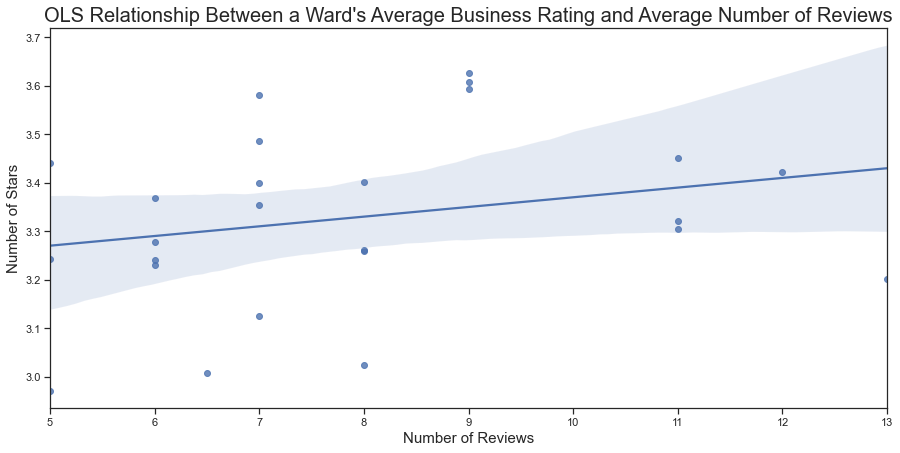

In [43]:
# scatter plot depicting ward-based Yelp daya
plt.figure(figsize = (15, 7))
ax = sns.regplot(x = "review_count" , y = "stars", data = ward_tor)

plt.title("OLS Relationship Between a Ward's Average Business Rating and Average Number of Reviews", fontsize = 20)
plt.xlabel("Number of Reviews", fontsize = 15)
plt.ylabel("Number of Stars", fontsize = 15)

#plt.savefig('figure_16.png', bbox_inches='tight')

In [44]:
ward_tor['const'] = 1

In [45]:
reg1 = sm.OLS(endog = ward_tor['stars'], exog = ward_tor[['const', 'review_count']], \
    missing='drop')
type(reg1)

results = reg1.fit()
type(results)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.489
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.235
Time:                        16:23:18   Log-Likelihood:                 8.4241
No. Observations:                  25   AIC:                            -12.85
Df Residuals:                      23   BIC:                            -10.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.1704      0.134     23.612   

Unsurprisingly, running a simple linear regression between these two variables leads to highly insignificant results. Beyond the paltry R-squared value of 0.061, the intercept value of 3.1704, while interpretable, is misleading because the lowest score a reviewer can give a business is 1 star, not 0. The slope value of 0.0200 indicates that for every one unit increase in the average number of reviews of a ward increases its business' average rating by 0.0200 stars. Of course, with a p-value of 0.235, the coefficient for the first explanatory variable is not close to being statistically significant at the 95% confidence level.

### Regression 2: Average Rating of a Business in Toronto ~ Number of Reviews, Population

Having only looked at the original two variables in this study, it is possible that the regression model will improve if I add some more variables. In the following three regressions, I incorporate population, average household income, and unemployment rate to the regression model, and continue as before. 

In [46]:
reg2 = sm.OLS(endog = ward_tor['stars'], exog = ward_tor[['const', 'review_count', 'Population', 
                                                          ]], \
    missing='drop')
type(reg2)

results = reg2.fit()
type(results)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7509
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.484
Time:                        16:23:18   Log-Likelihood:                 8.4653
No. Observations:                  25   AIC:                            -10.93
Df Residuals:                      22   BIC:                            -7.274
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.0161      0.588      5.125   

Adding population to the simple linear regression model does not improve the statistical significance of the model. The intercept value has decreased to 3.0161, and the average number of reviews and population only explain 6.4% of the variation in the average rating of a business in any given ward. The coefficient of 1.367e-06 indicates that for every one person increase in population, a ward can expect its business' rating to increase by 1.367e-06 stars on Yelp. While interesting, this explanatory variable is not significant at the 95% confidence level either.

### Regression 3: Average Rating of a Business in Toronto ~ Number of Reviews, Population, Average Household Income

In [47]:
reg3 = sm.OLS(endog = ward_tor['stars'], exog = ward_tor[['const', 'review_count', 'Population', 
                                                          'Average Household Income']], \
    missing='drop')
type(reg3)

results = reg3.fit()
type(results)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.189
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.338
Time:                        16:23:18   Log-Likelihood:                 9.6014
No. Observations:                  25   AIC:                            -11.20
Df Residuals:                      21   BIC:                            -6.327
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Adding average household income to the regression model increases the R-squared value significantly. The model's variables now explain 14.5% of the variation in the average rating of a business. The intercept term in the model drops to 2.8699, since I have added a positively correlated explanatory variable. The coefficient of the average household income parameter can be read as: for every one dollar increase in a ward's average household income, that ward can expect its business'
average rating to increase by 1.705e-06 stars. Despite being the most significant of the three explanatory variables used thus far, average household income is not statistically significant at the 95% confidence level either.

### Regression 4: Average Rating of a Business in Toronto ~ Number of Reviews, Population, Average Household Income, Unemployment Rate

In [48]:
reg4 = sm.OLS(endog = ward_tor['stars'], exog = ward_tor[['const', 'review_count', 'Population',
                                                          'Average Household Income', 'Unemployment Rate']], \
    missing='drop')
type(reg4)

results = reg4.fit()
type(results)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     4.421
Date:                Thu, 22 Apr 2021   Prob (F-statistic):             0.0101
Time:                        16:23:18   Log-Likelihood:                 15.559
No. Observations:                  25   AIC:                            -21.12
Df Residuals:                      20   BIC:                            -15.02
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

By including unemployment rate, I have increased the R-squared value to 0.469, meaning that 46.9% of the variation in the average business rating of any given ward can be explained by the number of reviews a business has, and the population, average household income, and unemployment rate of the ward itself. In adding a negatively correlated variable, the intercept term has jumped to 4.2523. Although the other regression parameters have exceedingly large p-values, it turns out that unemployment rate, with a p-value of 0.022 is statistically significant at the 95% confidence level.

It is very possible that the current OLS model suffers from multicolinearity or endogeneity issues, resulting in insignificant, biased, and inconsistent regression estimates. On the first note, I have already noted that the average rating of a business may be skewed by the characteristics of the reviewer itself. In terms of endogeneity, there may be certain two-way relationships between variables (e.g. between a ward's average household income and average business rating). As I discuss in the conclusion section of this notebook, more data can be incorporated to help resolve these issues. 

### Machine Learning and Regression Trees

In the final part of the analysis in this notebook, I use machine learning to create a regression tree based on the numeric data of the 'ward_tor' dataset. The regression tree model, which takes in unemployment rate, average household income, population, and median review count, is compared to a multiple linear regression containing all the same variables. 

I start by filtering out unnecessary data from 'ward_tor' and creating a naive linear model below. In the regression tree below, the objective or cost function is defined as "mean squared error" (MSE) or quadratic loss. The sum of squared distances between the actual and predicted values of the model, MSE is defined mathematically as:
$\frac{1}{n}\sum_{t=1}^{n}(y_i - y^p_i)^2$

As an objective function, MSE is easier to interpret, but less robust to outlier values as well. In this case, using MSE is sufficient because outlier points in this case are important to detect and analyze. 

In the following code blocks, I compare the MSE of regression 4 from earlier with a regression tree of depth 3.

In [49]:
# seperating the response variable from the regression parameters
rating_var = ward_tor["stars"]
# creating a dataframe for the models containing all explanatory variables
lr_model_df = ward_tor.drop(columns = ["stars", "Ward", "Average Individual Income", "Greater than Toronto Unemployment", "geometry", "geomlist", "const"])

lr_model_df.head()

Unemployment Rate  Average Household Income  Population  review_count
0               11.1                     72289      101115           7.0
1               11.0                     65458      107725           5.0
2               10.6                     73374      116960           6.5
3                9.9                     75768      104225          13.0
4                9.9                     78984       97610           8.0

In [50]:
# re-printing the intercept and coefficient values from regression 4
lr_model = linear_model.LinearRegression()
lr_model.fit(lr_model_df, rating_var)

print(lr_model.intercept_)
print(lr_model.coef_)

4.252265757766763
[-7.60105111e-02 -8.62976682e-07 -2.86598213e-06  1.06287995e-02]


In [51]:
# finding the MSE of the multiple linear regression
rating_pred_linear = lr_model.predict(lr_model_df)

full_mse = metrics.mean_squared_error(rating_var, rating_pred_linear)
print('Mean Squared Error:', full_mse)

Mean Squared Error: 0.016863204946461072


In [52]:
# finding the MSE of the regression tree with depth 3
sqft_tree = tree.DecisionTreeRegressor(max_depth = 3).fit(lr_model_df, rating_var)

ratings_pred_tree = sqft_tree.predict(lr_model_df)
print('Mean Squared Error:', metrics.mean_squared_error(rating_var, ratings_pred_tree))

Mean Squared Error: 0.004273139962415377


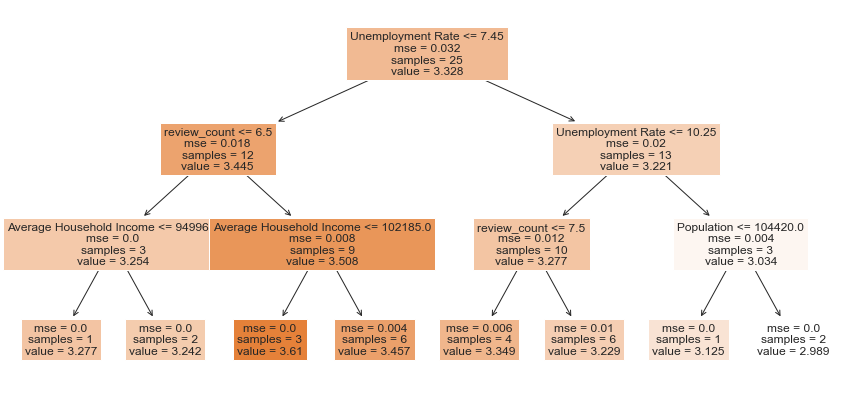

In [53]:
# plotting the regression tree
sqrf_fig = plt.figure(figsize = (15, 7))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names= lr_model_df.columns, filled = True, fontsize = 12)

plt.savefig('regression tree.png')

It turns out that the mean squared error of the multiple linear regression model (0.0169) is greater than the mean squared error of the regression tree with depth 3 (0.0042). At the first level, the tree splits on unemployment rate, then by review count and unemployment rate, and finally by population, average household income, and review count. 

In general the regression tree is able to create a more interpretable explanation for the regression output, inviting myself to ponder the predicted values for individual instances as hypotheticals; what-if scenarios as defined by the splits in the tree. 

Because there does not appear to be a distinct linear relationship between the explanatory variables and the average rating of a business (see: the four regressions from earlier), the tree is able to better capture relationships between inputs and outputs. Of course, if I was working with linear data, then one of the obvious disadvantages of the tree would be its failure to account for such linear relationships. 

Another disadvantage of the regression tree is that it is not nearly as robust in terms of accounting for new datapoints. The working dataset in this study is obviously quite small (since there are only 25 wards being looked at). However, if I were to look at businesses on their own (i.e. not grouped by area or any other statistic), then the output of the regression tree would be quite different. 

## Conclusion

### Results Summary
In this notebook, data from Yelp was taken from Kaggle to answer the following research question: For businesses in Toronto, can location and number of reviews predict the number of stars (i.e. rating) it receives from users?

Projects one and two focused on importing, cleaning, sorting, summarizing, and plotting three key statistics from Kaggle's Yelp dataset. In part one, I plotted the distribution of  the number of reviews businesses receive and the overall ratings distribution as well. I also plotted businesses by latitude and longitude to gauge an understanding of business location a geographic spread across the city. In part two, I reaffirmed the message or research question of this notebook, and included three new plots. The first was a rough sketch of a map by hand which illustrated the look, functionality, and purpose of the maps to come. The second map was an updated version of a figure plotted in project one. The third map was an interactive plot built using Plotly and Mapbox which featured zoom, click-and-drag, and other mouse capabilities. 

Projects three and four focused more on identifying a statistical relationship between my variables of interest. In part three, I incorporated two new datasets to help proxy as a location variable. Several ordered barplots were created looking to identify a relationship between Toronto's ward characteristics and its businesses. Because there were signs of any significant relationships, in part four I decided to run four regression models and build a regression tree. In general, I found that there was no significant relationship between the variables of interest in this study. It turns out that the number of reviews and certain ward characteristics have little to no influence on the average ratings of local businesses, at least in the Toronto area.  

### Limitations
The limitations of this study can be broken down into two main categories: 
- Limitations stemming from data  
- Limitations stemming from methodologies

In terms of data, I believe that there were no issues in terms of collecting, sorting, and describing the Yelp information. Any erroneous Yelp datapoints (e.g. businesses that had mislabelled locations or coordinates) were discarded, either at the start of the project or once the data was merged with the Toronto ward data. 

However, there may have been a sampling or selection bias with the Yelp dataset, since it was comprised of, "a subset of Yelp's businesses, reviews, and user data." Knowing this, certain parts of the city may have been disproportionately represented in the dataset.

Although there was no sample or selection bias plaguing the new datasets incorporated into this study, the actual selection of certain variables and measurements certainly limited the conclusiveness of the analyses performed in the latter half of this notebook.

Regarding methodologies, the decision to aggregate business data by ward may have been an oversight, as it limited the number of observations in the regression portion of the analysis. It is almost certain that the small sample size (25 wards = 25 observations) skewed each regression's output. Looking at the regressions specifically, it may have served this paper better to treat a business' ward as a categorical or dummy variable, and run the regression with the ~20000 individual business datapoints. By increasing the sample size, not only would the skewing of the regressions decrease, but my confidence in declaring results would increase as well. 

### Future Work
Future work should look to address some of the limitations of the findings displayed in this notebook.

Looking at sample size, researchers may remedy this problem by scraping Yelp data themselves, or by sampling data from other review aggregators like Zomato, Google Reviews, or Tripadvisor. 

In terms of plots and visualizations, including more interactive plots, as opposed to the static plots of part one and part two, will dramatically improve the comprehensibility and legibility of the first half of this notebook.

With regard to variable selection, using stricter criteria to increase the stratification level of the location parameter to the neighbourhood level will increase the sample size of any group analysis. As opposed to its 25 wards, Toronto is home to 140 neighbourhoods.

Concerning methodologies, employing a different regression/modelling technique (e.g. logistic regression, two-stage least squares regression, various nonlinear regressions, etc.) should lead to a more significant and rigorous conclusion. 

As a resource for other programmers, this notebook can be used to springboard further analysis on businesses not only in Toronto, but in other locations as well. The code has been commented throughout, and should be easily replicated with similar datasets. 

For those interested in Kaggle's Yelp dataset, I would strongly recommend incorporating other variables from the Yelp business dataset (e.g. looking at specific types of businesses, hours of operation, etc.), as well as some of Kaggle's other Yelp datasets, linked here: 
- Review-specific data: https://www.kaggle.com/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_review.json
- User-specific data: https://www.kaggle.com/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_user.json.